# Combining Data & Introduction to Basic Plotting

## Imports first! 
>- Note that when we give an alias upon import, that's how it is recognized. 

In [6]:
import pandas as pd
import numpy as np
import os
import datetime



In [7]:
ls

 Volume in drive C is Windows
 Volume Serial Number is 8650-7A23

 Directory of C:\Users\lukasz\Desktop\BAIM 3220 Python

04/20/2021  09:24 AM    <DIR>          .
04/20/2021  09:24 AM    <DIR>          ..
04/19/2021  02:23 PM    <DIR>          .ipynb_checkpoints
04/14/2021  10:05 AM             6,883 Basics_InClassActivity.ipynb
04/17/2021  10:07 AM        15,349,323 complete.csv
04/19/2021  02:56 PM            21,478 Dictionaries_TypeAlong.ipynb
04/13/2021  09:22 AM             9,145 DictionariesPart2_TypeAlongCOMPLETED.ipynb
03/30/2021  09:57 AM             3,837 Future50.csv
04/12/2021  01:20 PM           162,812 Homework6 Lukasz Stefanowicz.ipynb
04/13/2021  10:45 AM            25,428 Homework6.ipynb
04/01/2021  08:52 AM        33,633,170 JEOPARDY_CSV.csv
04/13/2021  09:31 AM            38,013 loans.csv
04/12/2021  07:57 PM           110,717 Lukasz Stefanowicz Homework 5.ipynb
03/30/2021  10:48 AM            54,263 Lukasz Stefanowicz Mar30_InClass.ipynb
04/17/2021  11:15 AM        

### Watch what happens as we try to call `pandas` 

In [8]:
loanDF=pandas.read_csv('loans.csv')

#pandas is not defined,can't use pandas instead of pd.

NameError: name 'pandas' is not defined

## You have to refer to pandas using the alias you gave it

In [9]:
loanDF=pd.read_csv('loans.csv')


## A quick and practical application of for loops to get the full name of a file you're interested in (say you have thousands of files and don't want to look through all the names, but know that you're looking for one related to weather)

### os.listdir() is a method that returns a list containing the names of the entries in the directory given by path
> https://www.tutorialspoint.com/python/os_listdir.htm

In [10]:
os.listdir(path)
#python method listdir() returns a list containing the names of the entries in the directory given by path.
#The list is in arbitrary order.
#It does not include the special entries "." and '.' even if they are present in the directory.

NameError: name 'path' is not defined

In [11]:
path= '/Users/lukasz/Desktop/BAIM 3220 Python'
for file in os.listdir(path):
    if 'weather' in file.lower() or 'plant' in file.lower():
        print(file)



Plant_1_Generation_Data.csv
Plant_1_Weather_Sensor_Data.csv


## Read in the files you found.

In [12]:
gdf=pd.read_csv("Plant_1_Generation_Data.csv")
sdf=pd.read_csv("Plant_1_Weather_Sensor_Data.csv")


### This is data collected from a solar power plants in India over a 34 day period. There is both a power generation dataset and a sensor readings dataset. The power generation datasets are gathered at the inverter level - each inverter has multiple lines of solar panels attached to it. The sensor data is gathered at a plant level - single array of sensors optimally placed at the plant.

# COMBINING DATA 

>- `merge()` for combining data on common columns or indices
>- `.join()` for combining data on a key column or an index
>- `concat()` for combining DataFrames across rows or columns

## The merge() function in Pandas is our friend here. By default, the merge function performs an inner join and will get rid of nulls.
>- Inner join = only produce records when the values are equal 
>- Inner and outer are two strategies for nulls 
>- Inner returns matching data, outer returns non-matching data 
>- Outer join will horizontally combine two datasets on a key; if two rows from each dataset share a value it will join those rows, otherwise will keep row and fill remaining columns with nulls

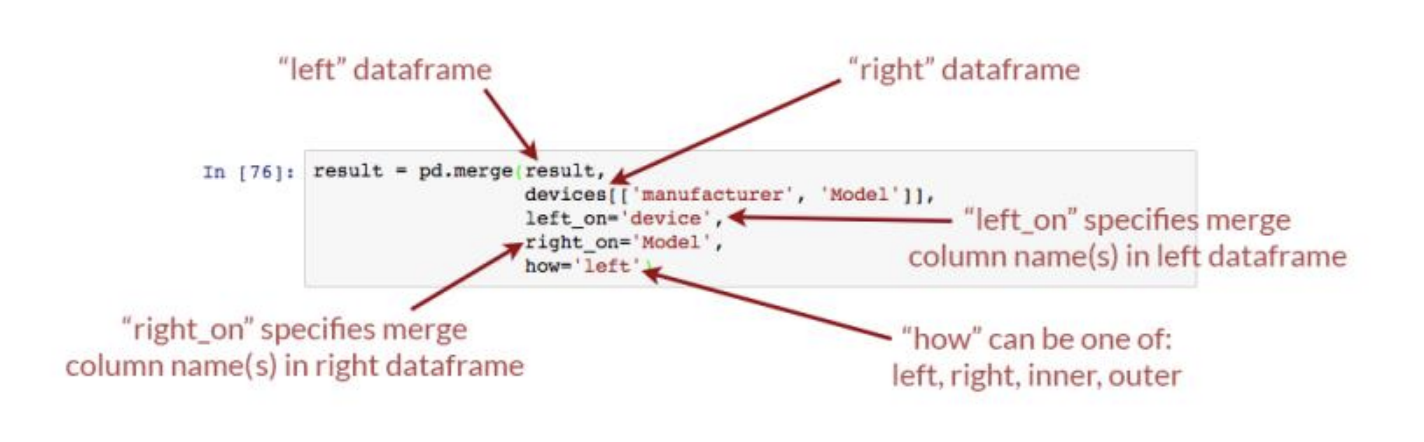

In [13]:
merged=pd.merge(sdf,gdf,on=["DATE_TIME"])
merged.shape


(0, 12)

In [14]:
help(pd.merge)


Help on function merge in module pandas.core.reshape.merge:

merge(left, right, how: str = 'inner', on=None, left_on=None, right_on=None, left_index: bool = False, right_index: bool = False, sort: bool = False, suffixes=('_x', '_y'), copy: bool = True, indicator: bool = False, validate=None) -> 'DataFrame'
    Merge DataFrame or named Series objects with a database-style join.
    
    The join is done on columns or indexes. If joining columns on
    columns, the DataFrame indexes *will be ignored*. Otherwise if joining indexes
    on indexes or indexes on a column or columns, the index will be passed on.
    
    Parameters
    ----------
    left : DataFrame
    right : DataFrame or named Series
        Object to merge with.
    how : {'left', 'right', 'outer', 'inner'}, default 'inner'
        Type of merge to be performed.
    
        * left: use only keys from left frame, similar to a SQL left outer join;
          preserve key order.
        * right: use only keys from right fra

In [15]:
help(pd.to_datetime)

Help on function to_datetime in module pandas.core.tools.datetimes:

to_datetime(arg: Union[~DatetimeScalar, List, Tuple, ~ArrayLike, ForwardRef('Series')], errors: str = 'raise', dayfirst: bool = False, yearfirst: bool = False, utc: Union[bool, NoneType] = None, format: Union[str, NoneType] = None, exact: bool = True, unit: Union[str, NoneType] = None, infer_datetime_format: bool = False, origin='unix', cache: bool = True) -> Union[pandas.core.indexes.datetimes.DatetimeIndex, ForwardRef('Series'), ~DatetimeScalar, ForwardRef('NaTType')]
    Convert argument to datetime.
    
    Parameters
    ----------
    arg : int, float, str, datetime, list, tuple, 1-d array, Series, DataFrame/dict-like
        The object to convert to a datetime.
    errors : {'ignore', 'raise', 'coerce'}, default 'raise'
        - If 'raise', then invalid parsing will raise an exception.
        - If 'coerce', then invalid parsing will be set as NaT.
        - If 'ignore', then invalid parsing will return the i

### Merging doesn't work because the dates are not being recognized as being the same values. To have them be treated as such, we can use pandas' time/date functionality to .
>- https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html

In [16]:
sdf['DATE_TIME']=pd.to_datetime(sdf['DATE_TIME'])
gdf['DATE_TIME']=pd.to_datetime(gdf['DATE_TIME'])
sdf.dtypes

DATE_TIME              datetime64[ns]
PLANT_ID                        int64
SOURCE_KEY                     object
AMBIENT_TEMPERATURE           float64
MODULE_TEMPERATURE            float64
IRRADIATION                   float64
dtype: object

In [17]:
merged=pd.merge(sdf,gdf,on=['DATE_TIME'])
merged
merged.shape
#merged is inner join

(45680, 12)

In [18]:
merged

,DATE_TIME,PLANT_ID_x,SOURCE_KEY_x,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,PLANT_ID_y,SOURCE_KEY_y,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.000,6259559.0
1,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.000,6183645.0
2,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.000,6987759.0
3,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.000,7602960.0
4,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.000,7158964.0
...,...,...,...,...,...,...,...,...,...,...,...,...
45675,2020-06-17 23:45:00,4135001,HmiyD2TTLFNqkNe,21.909288,20.427972,0.0,4135001,uHbuxQJl8lW7ozc,0.0,0.0,5967.000,7287002.0
45676,2020-06-17 23:45:00,4135001,HmiyD2TTLFNqkNe,21.909288,20.427972,0.0,4135001,wCURE6d3bPkepu2,0.0,0.0,5147.625,7028601.0
45677,2020-06-17 23:45:00,4135001,HmiyD2TTLFNqkNe,21.909288,20.427972,0.0,4135001,z9Y9gH1T5YWrNuG,0.0,0.0,5819.000,7251204.0
45678,2020-06-17 23:45:00,4135001,HmiyD2TTLFNqkNe,21.909288,20.427972,0.0,4135001,zBIq5rxdHJRwDNY,0.0,0.0,5817.000,6583369.0


### We can convert the column to datetime objects with `.to_datetime()`

## Left joins keep nulls on the left dataframe - let's change our first dataframe to have a null in the first entry. You can use `.to_csv()` to save a dataframe to a csv 

In [19]:
sdf.to_csv("sdfTester")
#can them just go back to folder,remove some data and then read back in 
#this can also let ya read your data if you dont want mess with python tables && just look at csv

In [20]:
sdf2=pd.read_csv('sdfTester')
sdf2

,Unnamed: 0,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2,2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0
3,3,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0
4,4,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0
...,...,...,...,...,...,...,...
3177,3177,2020-06-17 22:45:00,4135001,HmiyD2TTLFNqkNe,22.150570,21.480377,0.0
3178,3178,2020-06-17 23:00:00,4135001,HmiyD2TTLFNqkNe,22.129816,21.389024,0.0
3179,3179,2020-06-17 23:15:00,4135001,HmiyD2TTLFNqkNe,22.008275,20.709211,0.0
3180,3180,2020-06-17 23:30:00,4135001,HmiyD2TTLFNqkNe,21.969495,20.734963,0.0


## Now perform a left merge on the edited dataframe and the original `gdf` 

In [21]:
sdf2['DATE_TIME']=pd.to_datetime(sdf2['DATE_TIME']) #changing the edited dataframe back to date-time objects

In [22]:
leftMerged=pd.merge(sdf2,gdf,on=['DATE_TIME'],how='left')
leftMerged

,Unnamed: 0,DATE_TIME,PLANT_ID_x,SOURCE_KEY_x,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,PLANT_ID_y,SOURCE_KEY_y,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,4135001.0,1BY6WEcLGh8j5v7,0.0,0.0,0.000,6259559.0
1,0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,4135001.0,1IF53ai7Xc0U56Y,0.0,0.0,0.000,6183645.0
2,0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,4135001.0,3PZuoBAID5Wc2HD,0.0,0.0,0.000,6987759.0
3,0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,4135001.0,7JYdWkrLSPkdwr4,0.0,0.0,0.000,7602960.0
4,0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,4135001.0,McdE0feGgRqW7Ca,0.0,0.0,0.000,7158964.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
46755,3181,2020-06-17 23:45:00,4135001,HmiyD2TTLFNqkNe,21.909288,20.427972,0.0,4135001.0,uHbuxQJl8lW7ozc,0.0,0.0,5967.000,7287002.0
46756,3181,2020-06-17 23:45:00,4135001,HmiyD2TTLFNqkNe,21.909288,20.427972,0.0,4135001.0,wCURE6d3bPkepu2,0.0,0.0,5147.625,7028601.0
46757,3181,2020-06-17 23:45:00,4135001,HmiyD2TTLFNqkNe,21.909288,20.427972,0.0,4135001.0,z9Y9gH1T5YWrNuG,0.0,0.0,5819.000,7251204.0
46758,3181,2020-06-17 23:45:00,4135001,HmiyD2TTLFNqkNe,21.909288,20.427972,0.0,4135001.0,zBIq5rxdHJRwDNY,0.0,0.0,5817.000,6583369.0


## Let's compare it to a right join 

In [23]:
rightMerged=pd.merge(sdf2,gdf,on=['DATE_TIME'],how='right')
rightMerged

,Unnamed: 0,DATE_TIME,PLANT_ID_x,SOURCE_KEY_x,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,PLANT_ID_y,SOURCE_KEY_y,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,0.0,2020-05-15 00:00:00,4135001.0,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.000,6259559.0
1,0.0,2020-05-15 00:00:00,4135001.0,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.000,6183645.0
2,0.0,2020-05-15 00:00:00,4135001.0,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.000,6987759.0
3,0.0,2020-05-15 00:00:00,4135001.0,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.000,7602960.0
4,0.0,2020-05-15 00:00:00,4135001.0,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.000,7158964.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
68773,3181.0,2020-06-17 23:45:00,4135001.0,HmiyD2TTLFNqkNe,21.909288,20.427972,0.0,4135001,uHbuxQJl8lW7ozc,0.0,0.0,5967.000,7287002.0
68774,3181.0,2020-06-17 23:45:00,4135001.0,HmiyD2TTLFNqkNe,21.909288,20.427972,0.0,4135001,wCURE6d3bPkepu2,0.0,0.0,5147.625,7028601.0
68775,3181.0,2020-06-17 23:45:00,4135001.0,HmiyD2TTLFNqkNe,21.909288,20.427972,0.0,4135001,z9Y9gH1T5YWrNuG,0.0,0.0,5819.000,7251204.0
68776,3181.0,2020-06-17 23:45:00,4135001.0,HmiyD2TTLFNqkNe,21.909288,20.427972,0.0,4135001,zBIq5rxdHJRwDNY,0.0,0.0,5817.000,6583369.0


### What happens here is that because row 0 `gdf` is whatever value it is, and the dataframes are being joined on date time, it is looking in `sdf2` for a matching date time but it doesn't exist. Since it is a right join, it keeps everything in our right dataframe (`gdf`) but filling in nulls, as to not gett rid of any of the rows from `gdf`.

# Basic plotting in Python (without any libraries)

<AxesSubplot:>

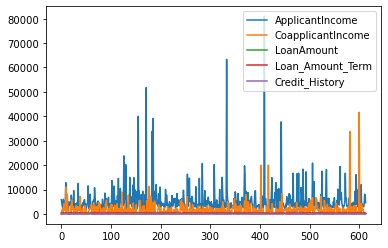

In [24]:
loanDF.plot()

In [25]:
loanDF.groupby('Loan_Amount_Term')['LoanAmount'].mean()


Loan_Amount_Term
12.0     111.000000
36.0     117.500000
60.0     140.000000
84.0     132.250000
120.0     22.333333
180.0    147.523810
240.0    118.333333
300.0    185.153846
360.0    147.245436
480.0    151.800000
Name: LoanAmount, dtype: float64

<AxesSubplot:xlabel='Loan_Amount_Term'>

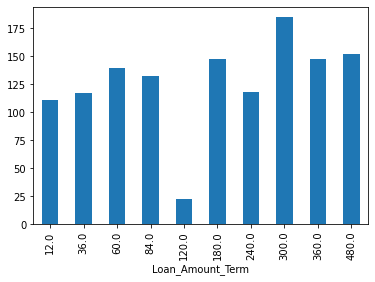

In [26]:
loanDF.groupby("Loan_Amount_Term")['LoanAmount'].mean().plot(kind='bar')

<AxesSubplot:xlabel='Loan_Amount_Term'>

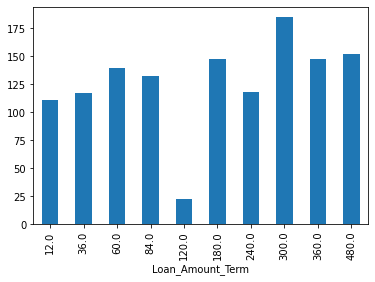

In [27]:
loanDF.groupby('Loan_Amount_Term')['LoanAmount'].mean().plot(kind='bar')

<AxesSubplot:xlabel='ApplicantIncome'>

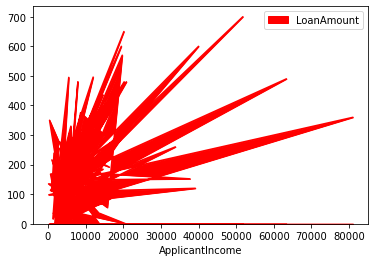

In [28]:
loanDF.plot.area(x="ApplicantIncome",y="LoanAmount",color='red')

<AxesSubplot:ylabel='Frequency'>

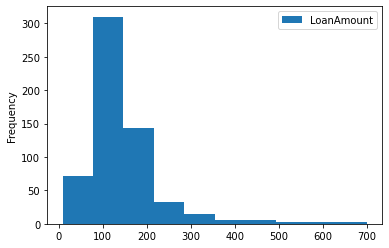

In [29]:
loanDF.plot.hist(x="ApplicantIncome",y="LoanAmount")

KeyError: 'MODULE_TEMPER'

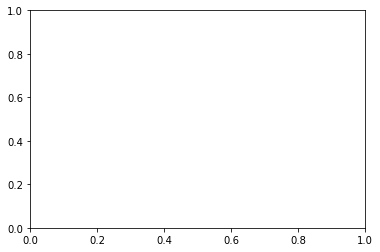

In [30]:
merged.plot.scatter(x="AMBIENT_TEMPERATURE",y="MODULE_TEMPER")

In [31]:
help(merged.plot)

Help on PlotAccessor in module pandas.plotting._core object:

class PlotAccessor(pandas.core.base.PandasObject)
 |  PlotAccessor(data)
 |  
 |  Make plots of Series or DataFrame.
 |  
 |  Uses the backend specified by the
 |  option ``plotting.backend``. By default, matplotlib is used.
 |  
 |  Parameters
 |  ----------
 |  data : Series or DataFrame
 |      The object for which the method is called.
 |  x : label or position, default None
 |      Only used if data is a DataFrame.
 |  y : label, position or list of label, positions, default None
 |      Allows plotting of one column versus another. Only used if data is a
 |      DataFrame.
 |  kind : str
 |      The kind of plot to produce:
 |  
 |      - 'line' : line plot (default)
 |      - 'bar' : vertical bar plot
 |      - 'barh' : horizontal bar plot
 |      - 'hist' : histogram
 |      - 'box' : boxplot
 |      - 'kde' : Kernel Density Estimation plot
 |      - 'density' : same as 'kde'
 |      - 'area' : area plot
 |      - 'p